# This notebook is using data from California extracted from sklearn library.

## Plot the shap_values extracted from a binary file.

In [1]:
from instrumentum.explainability import ShapExtension, Plots
shapext = ShapExtension()
plot = Plots()

In [2]:
shap_values = shapext.load_values('shap_values_12_2_2022.bin')

In [3]:
plot.force(shap_values[345])

Force plots simulate the interactions between features and arrange them in a way they can represent their influences in the prediction. For Shapley values we can see how much each variable contributed to the prediction, where red represent moving the contribution `higher` toward 1 and blue moving `lower` toward 0 (considering a probability from 0 to 1). To get a prediction of shap_values[0] -- representing the first row -- will have a force corresponding a prediction for that row. But passing the whole shap_values will report in the contributions into a horizontally positioned stack of force plots per each row. 


In [23]:
plot.force(shap_values[-100:,:])

Force plots simulate the interactions between features and arrange them in a way they can represent their influences in the prediction. For Shapley values we can see how much each variable contributed to the prediction, where red represent moving the contribution `higher` toward 1 and blue moving `lower` toward 0 (considering a probability from 0 to 1). To get a prediction of shap_values[0] -- representing the first row -- will have a force corresponding a prediction for that row. But passing the whole shap_values will report in the contributions into a horizontally positioned stack of force plots per each row. 


In [4]:
plot.plot_values(
    vis = 'force',
    shap_values = shap_values[345],
)

Force plot it is not yet supported with this method, please call force for example with `plot.force(shap_values)` for a global explanation, or `plot.force(shap_values[0])`, where 0 represent the client or row to analyze, and `plot` is the initialization of the class Plot().


In [5]:
import shap
shap.plots.force(shap_values[345])

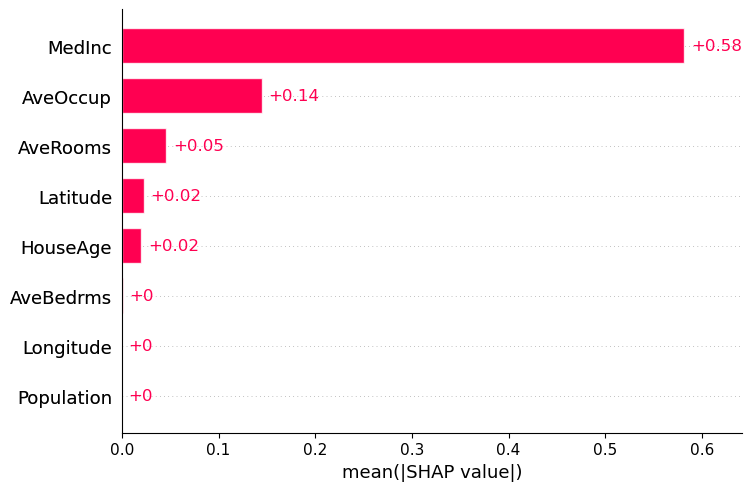

Bar graph allows two options: when is on GLOBAL (shows all shap_values) it give us the mean of the absolute value of the SHAP value allowing us to see which variables have contributed the most. This prediction include positive and negative controntribution, where negative push the prediction to 0 (0%) and positive to 1 (100%). In other hands when it on LOCAL (shows a specific shap_value, example shap_value[0]) it is specified for a single client, or person who that row is related to, in this case the values are shown on red moving to the right, indicating pushing the prediction to 1, and are on blue bars moving to the left, which means is pushing the prediction to 0.


In [6]:
plot.plot_values(
    vis = 'bar',
    shap_values = shap_values
)

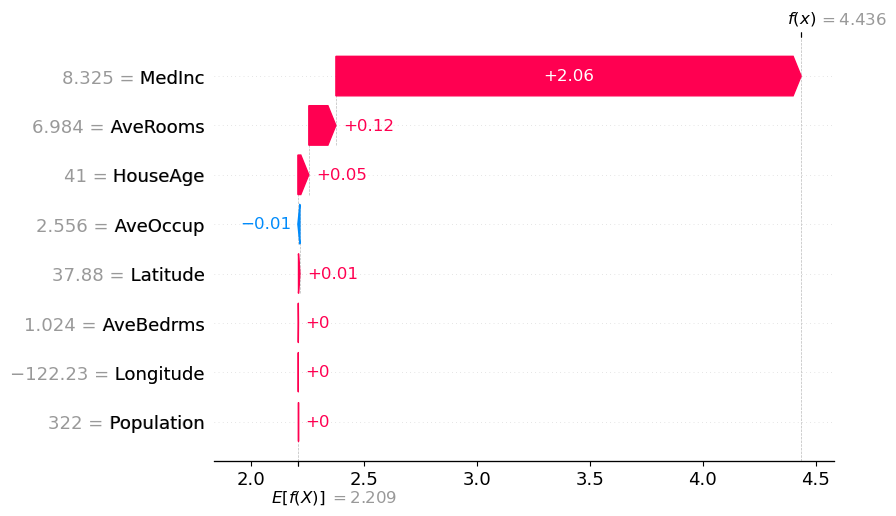

Waterfall it is defined as a LOCAL graph, which means it only predict values decicated to a client, person or whatever a row identify. When graph are red moving to the right indicate is moving the prediction to 1 (100%), when they are blue means it is moving the prediction to 0 (0%), this  graph also in the left of the variables allow us to see the current value of all the variables connected with the current row, which give a better idea of what is happening.


In [7]:
plot.plot_values(
    vis = 'waterfall',
    shap_values = shap_values[0]
)

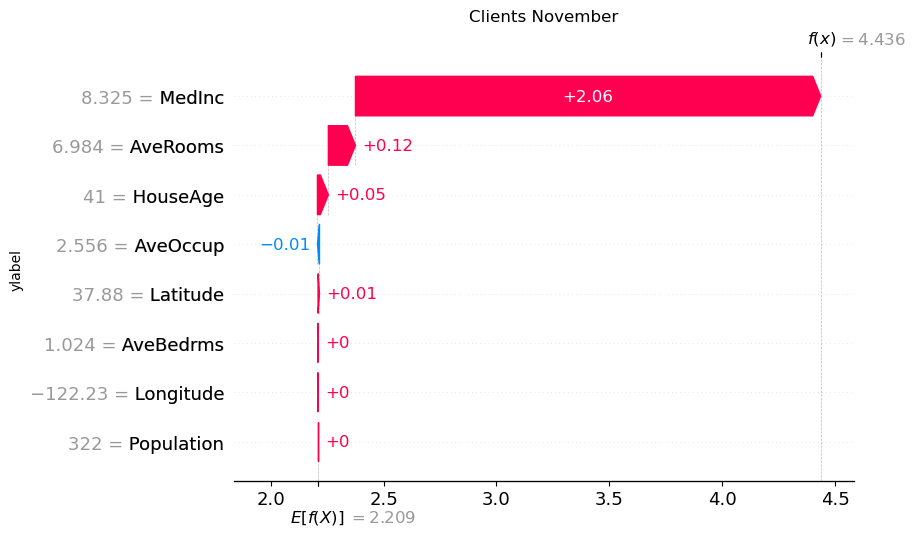

Waterfall it is defined as a LOCAL graph, which means it only predict values decicated to a client, person or whatever a row identify. When graph are red moving to the right indicate is moving the prediction to 1 (100%), when they are blue means it is moving the prediction to 0 (0%), this  graph also in the left of the variables allow us to see the current value of all the variables connected with the current row, which give a better idea of what is happening.


In [8]:
plot.plot_values(
    vis = 'waterfall',
    shap_values = shap_values[0],
    title="Clients November",
    title_size=12,
    ylabel='ylabel',
    ylabel_size=10
)

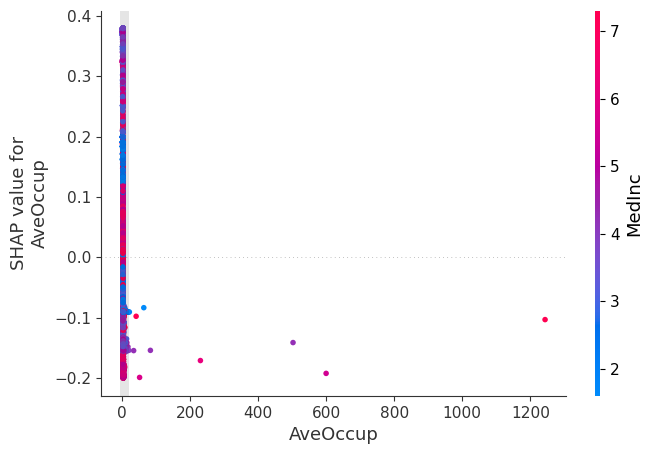

With the scatter we can create a dependence scatter plot to allows see what effect a single variable have ascross the whole dataset.


In [9]:
plot.plot_values(
    vis = 'scatter',
    shap_values = shap_values[:, "AveOccup"],
    color = shap_values[:, "MedInc"]
)

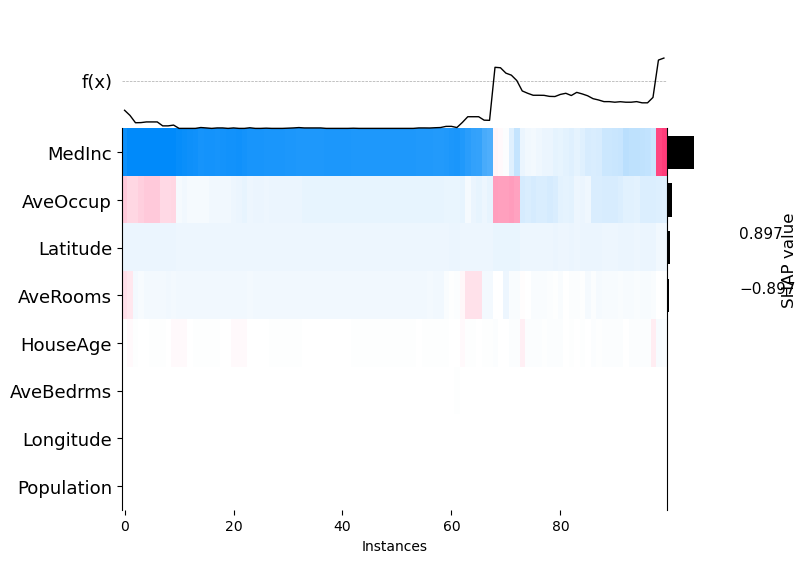

Heatmap allow us to see the instances of the shap_values in the x-axis and we can see the the variables related with the model in the y-axis. The output of the model can be seen above in the f(x) function.


In [10]:
plot.plot_values(
    vis = 'heatmap',
    shap_values = shap_values[-100:,:]
)

In [11]:
print(shap_values.values[3])

[ 8.93238003e-01  6.98828526e-02 -2.29740728e-02  3.51057609e-04
  0.00000000e+00  1.18047078e-01  4.11653236e-03  8.83861445e-04]


In [12]:
plot.plot_values(
    vis = 'force',
    shap_values = shap_values.values[0],
    base_value = shap_values.base_values[0],
    # base_value = shap_values.base_values
)

Force plot it is not yet supported with this method, please call force for example with `plot.force(shap_values)` for a global explanation, or `plot.force(shap_values[0])`, where 0 represent the client or row to analyze, and `plot` is the initialization of the class Plot().


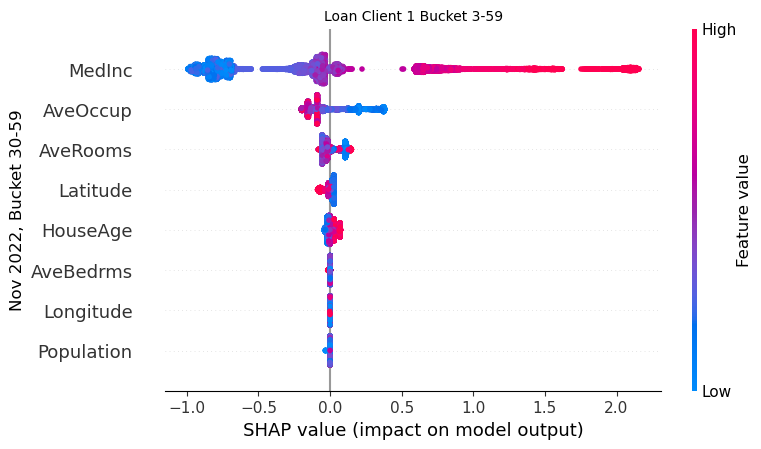

Beeswarm plot are points placed in a way to avoid overlaps of the data and understand better the distribution. For Shapley values it summarizes the effects of all the features.


In [13]:
plot.plot_values(
    vis = 'beeswarm',
    shap_values = shap_values,
    title="Loan Client 1 Bucket 3-59",
    title_size=10,
    ylabel="Nov 2022, Bucket 30-59",
    ylabel_size=12
)

## Creating the explainer and plotting the graphs

In [14]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

import numpy as np
import pandas as pd
data = np.c_[housing.data, housing.target]
columns = np.append(housing.feature_names, ['target'])
housing_df = pd.DataFrame(data, columns=columns)

X = housing_df.drop(columns=['target'])
y = housing.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

import xgboost
reg = xgboost.XGBRFRegressor(n_estimators=100, reg_lambda=1, gamma=0, max_depth=3)
reg.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
               grow_policy='depthwise', importance_type=None,
               interaction_constraints='', max_bin=256, max_cat_threshold=64,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, ...)

You selected an agnostic explainer.


 96%|=================== | 13823/14448 [00:17<00:00]       

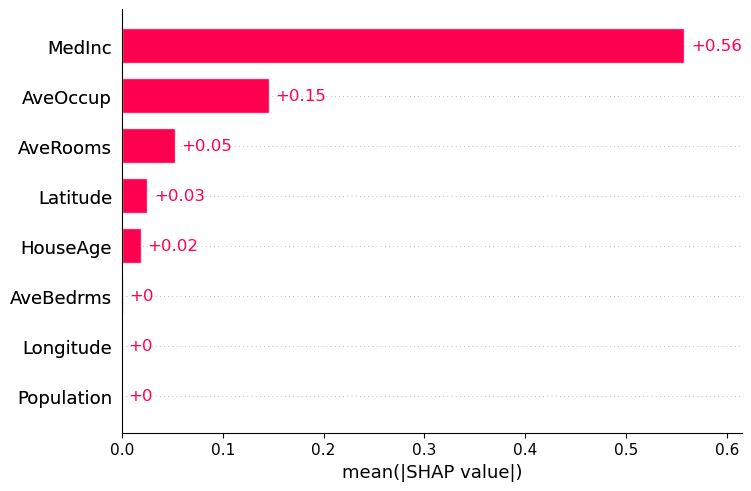

Bar graph allows two options: when is on GLOBAL (shows all shap_values) it give us the mean of the absolute value of the SHAP value allowing us to see which variables have contributed the most. This prediction include positive and negative controntribution, where negative push the prediction to 0 (0%) and positive to 1 (100%). In other hands when it on LOCAL (shows a specific shap_value, example shap_value[0]) it is specified for a single client, or person who that row is related to, in this case the values are shown on red moving to the right, indicating pushing the prediction to 1, and are on blue bars moving to the left, which means is pushing the prediction to 0.


In [15]:
from instrumentum.explainability import ShapExtension
explain = ShapExtension(
    model=reg,
    x_var=X_train
)
explain.features_importance()

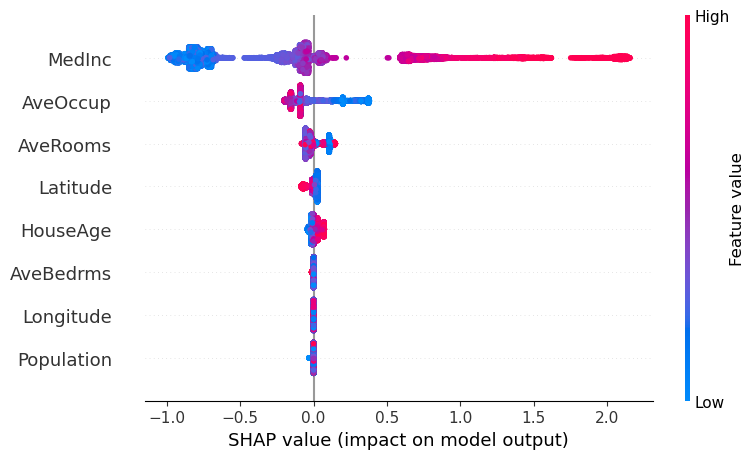

Summary is a special plot, which allow is to have a dot plot (by default) or a violin plot (by adding plot_type = 'violin' as part of the parameters). Both plots help summarizing the effects of all the features. The color represents the average feature value at that position.


In [16]:
plot.plot_values(
    vis = 'summary',
    shap_values = shap_values[100:,:],
    # expected_value = explain.expected_value()
)

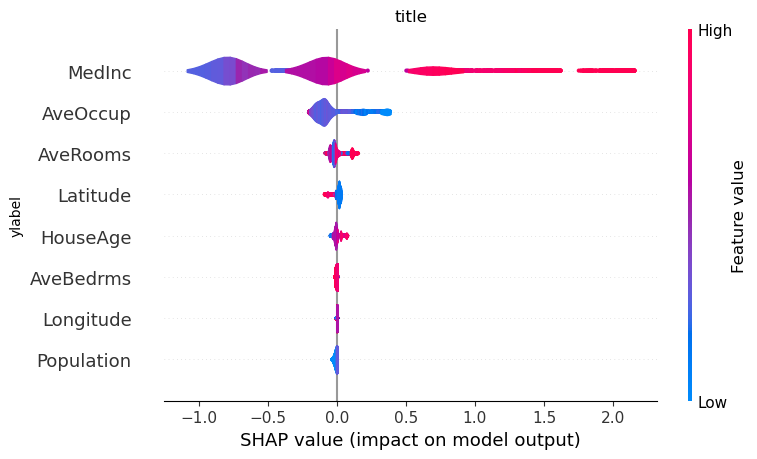

Summary is a special plot, which allow is to have a dot plot (by default) or a violin plot (by adding plot_type = 'violin' as part of the parameters). Both plots help summarizing the effects of all the features. The color represents the average feature value at that position.


In [17]:
plot.plot_values(
    vis = 'summary',
    plot_type = 'violin',
    shap_values = shap_values[100:,:],
    title='title',
    title_size=12,
    ylabel='ylabel',
    ylabel_size=10
)

In [18]:
exp = explain.tree(
    model = reg,
    shap_values = shap_values,
    feature_names = X_train.columns
)
vals = exp(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


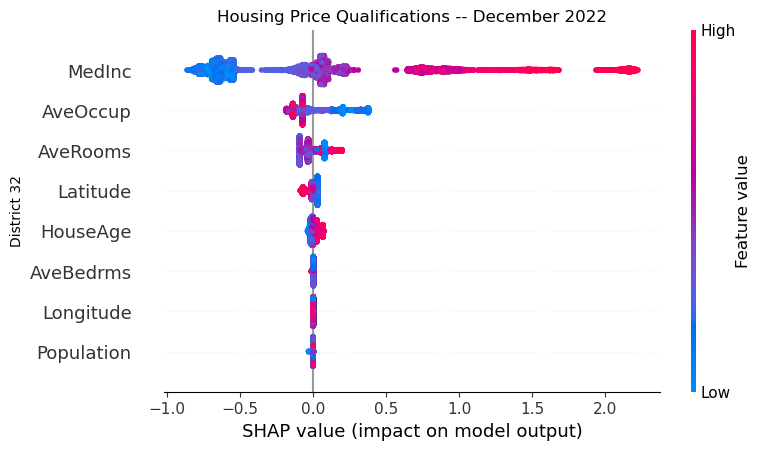

Beeswarm plot are points placed in a way to avoid overlaps of the data and understand better the distribution. For Shapley values it summarizes the effects of all the features.


In [19]:
pl = Plots()
pl.plot_values(
    vis = 'beeswarm',
    shap_values = vals,
    title="Housing Price Qualifications -- December 2022",
    title_size=12,
    ylabel="District 32",
    ylabel_size=10
)

You selected an agnostic explainer.


 97%|=================== | 13973/14448 [00:16<00:00]       

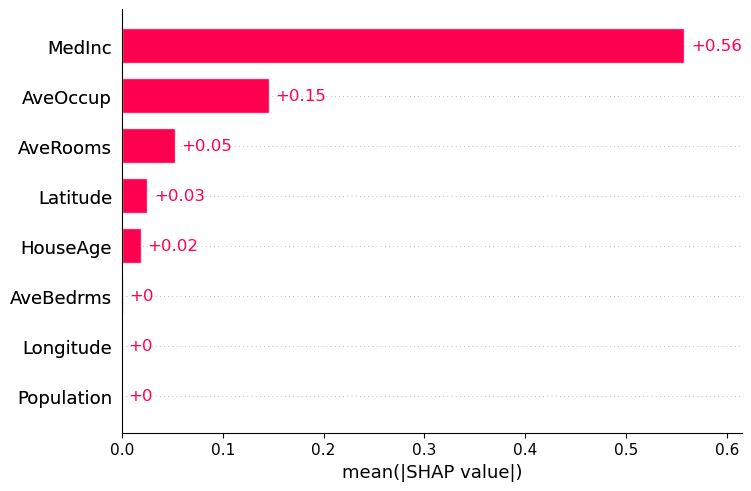

Bar graph allows two options: when is on GLOBAL (shows all shap_values) it give us the mean of the absolute value of the SHAP value allowing us to see which variables have contributed the most. This prediction include positive and negative controntribution, where negative push the prediction to 0 (0%) and positive to 1 (100%). In other hands when it on LOCAL (shows a specific shap_value, example shap_value[0]) it is specified for a single client, or person who that row is related to, in this case the values are shown on red moving to the right, indicating pushing the prediction to 1, and are on blue bars moving to the left, which means is pushing the prediction to 0.


In [20]:
explain.features_importance()

In [21]:
shap_values = explain.shap_values()
expected_value = explain.expected_value()

In [22]:
print("EXPLAIN CLASS: ", explain)
print("SHAP VALUES: ", shap_values)
print("EXPECTED VALUE: ", expected_value)

EXPLAIN CLASS:  <instrumentum.explainability.shap_extension.ShapExtension object at 0x000001F515044490>
SHAP VALUES:  .values =
array([[ 1.42515525e-01, -1.67505021e-02, -2.55318707e-02, ...,
        -1.64613459e-01,  2.03278128e-02, -1.51519105e-04],
       [-2.83696547e-03, -1.43811475e-02, -3.27565018e-02, ...,
        -1.38485227e-01,  2.20036244e-02, -1.51519105e-04],
       [-6.07111428e-01, -1.27825399e-03, -6.86716444e-02, ...,
        -8.75095570e-02, -9.47618321e-03,  1.01012737e-04],
       ...,
       [ 8.37463453e-01, -2.80285358e-02, -3.14182888e-02, ...,
        -1.99271462e-01,  3.13981337e-03,  9.34367813e-04],
       [ 2.86264149e-01,  6.49365013e-02, -1.93539842e-02, ...,
         3.52959726e-01,  1.16379283e-02,  1.01012737e-04],
       [-5.98732792e-01, -5.48302494e-03, -6.81460399e-02, ...,
        -8.75095570e-02, -9.47618321e-03,  1.01012737e-04]])

.base_values =
array([2.02472047, 2.02472047, 2.02472047, ..., 2.02472047, 2.02472047,
       2.02472047])

.data 